In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [3]:
url = 'https://api.coingecko.com/api/v3/coins/markets'
params = {
    'vs_currency': 'usd',               
    'order': 'market_cap_desc',                          
    'sparkline': False               
}

response = requests.get(url, params=params)
df= pd.DataFrame(response.json())[['id' ,'symbol' , 'current_price' ,'market_cap' ,'market_cap_rank' , 'total_supply' ,'max_supply']]
df=df.drop_duplicates()
df = df.fillna('000000')
df.head(10)

,id,symbol,current_price,market_cap,market_cap_rank,total_supply,max_supply
0,bitcoin,btc,114542.000000,2279633177891,1,1.990166e+07,21000000.0
1,ethereum,eth,3552.720000,428779670857,2,1.207096e+08,000000
2,ripple,xrp,3.010000,178659100348,3,9.998588e+10,100000000000.0
3,tether,usdt,1.000000,163897164114,4,1.638945e+11,000000
4,binancecoin,bnb,758.580000,105676862949,5,1.392883e+08,200000000.0
5,solana,sol,163.700000,88123029279,6,6.067587e+08,000000
6,usd-coin,usdc,0.999757,64149304849,7,6.419221e+10,000000
7,staked-ether,steth,3546.900000,31616629250,8,8.913397e+06,000000
8,tron,trx,0.329755,31232889188,9,9.471243e+10,000000
9,dogecoin,doge,0.202506,30459072265,10,1.503761e+11,000000


In [7]:
df2=df.sort_values('market_cap_rank').head(5)
df2

,id,symbol,current_price,market_cap,market_cap_rank,total_supply,max_supply
0,bitcoin,btc,114542.00,2279633177891,1,1.990166e+07,21000000.0
1,ethereum,eth,3552.72,428779670857,2,1.207096e+08,000000
2,ripple,xrp,3.01,178659100348,3,9.998588e+10,100000000000.0
3,tether,usdt,1.00,163897164114,4,1.638945e+11,000000
4,binancecoin,bnb,758.58,105676862949,5,1.392883e+08,200000000.0


# Visualization Of Top 5 coins

<Axes: title={'center': 'Top 5 Coins market Cap'}, xlabel='Coin Name', ylabel='Current Price in ($)'>

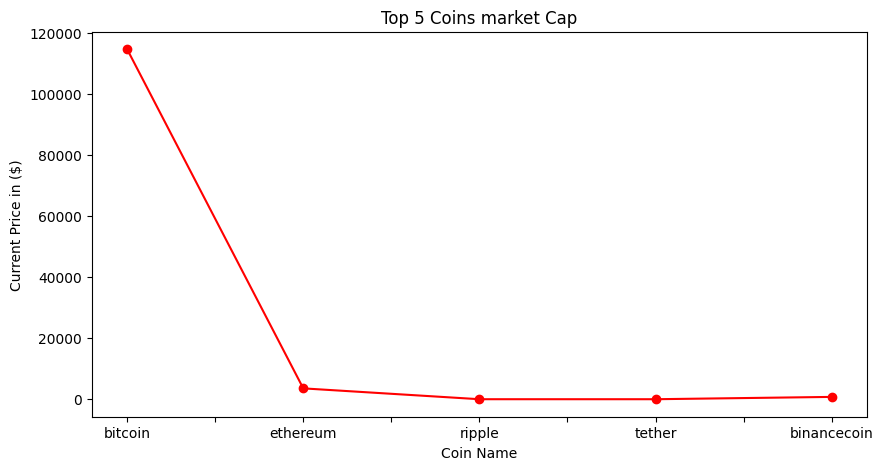

In [29]:
#Line graph for top 5 coins based on curent price 
df2.set_index('id')['current_price'].plot( kind = 'line', color = 'red' , marker='o' , xlabel='Coin Name' , ylabel='Current Price in ($)' , title = 'Top 5 Coins market Cap' ,
    figsize = (10,5)  )
   
    


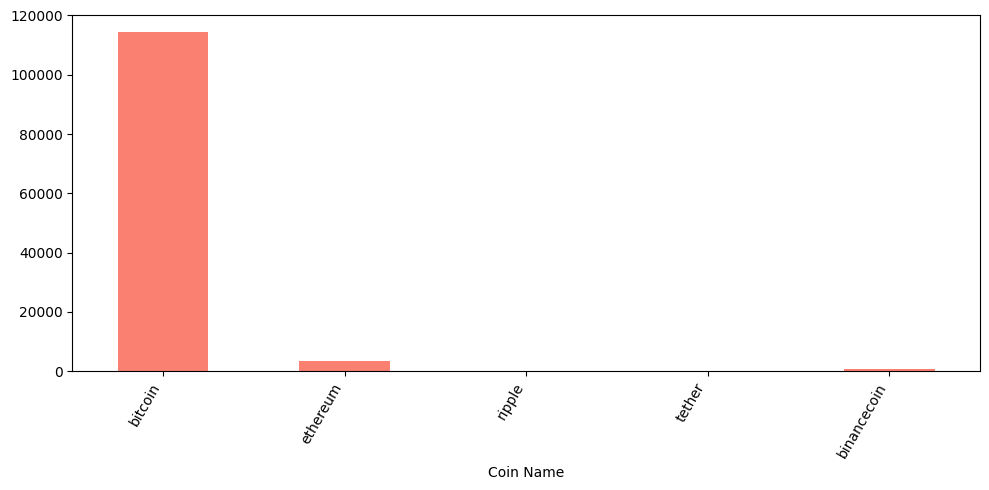

In [34]:
import matplotlib.pyplot as plt

ax = df2.set_index('id')['current_price'].plot(
    kind='bar',
    color='salmon',
    figsize=(10, 5),
    xlabel='Coin Name'
)

plt.xticks(rotation=60, ha='right')  # control tick label rotation and alignment
plt.tight_layout()
plt.show()


<Axes: xlabel='Coin name', ylabel='current price ($)'>

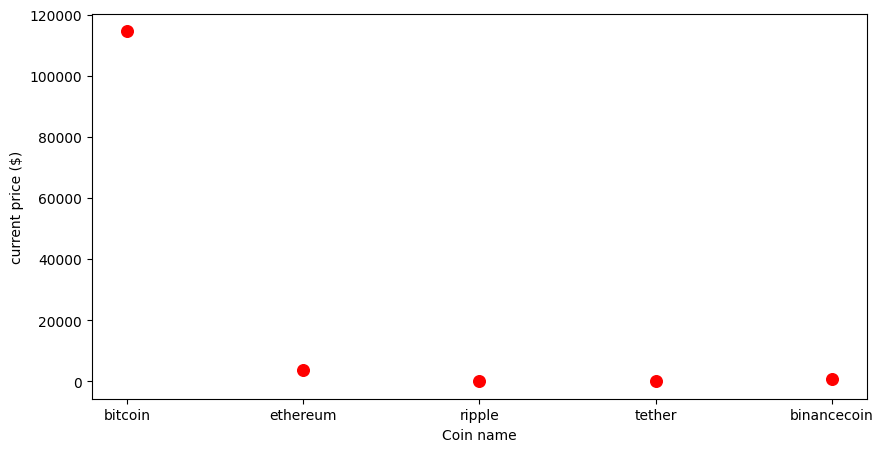

In [53]:
df2.plot.scatter( x='id' , y='current_price' , figsize=(10,5) , xlabel='Coin name' , ylabel = 'current price ($)' , s=70 , marker = 'o' , c= 'red')

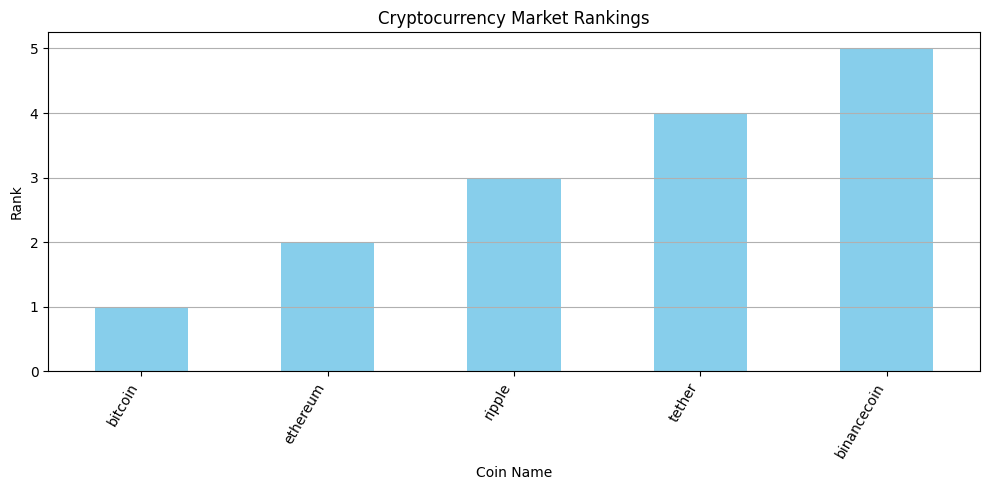

In [70]:
df2.set_index('id')['market_cap_rank'].plot(
    kind='bar',
    color='skyblue',
    figsize=(10, 5)
)
plt.title('Cryptocurrency Market Rankings')
plt.xlabel('Coin Name')
plt.ylabel('Rank')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


<Axes: title={'center': 'Top 5 Crypto coin market Cap'}, ylabel='market_cap'>

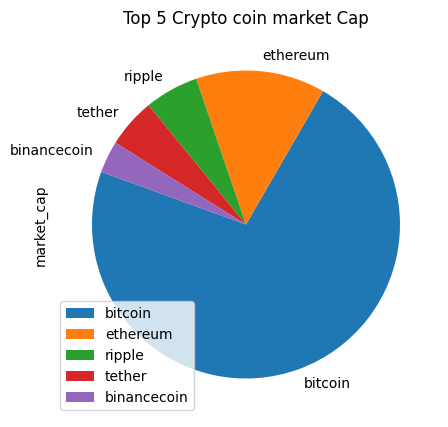

In [83]:
df2['max_supply'] = pd.to_numeric(df2['market_cap'])
df2.set_index('id').plot.pie(y ='market_cap' , figsize=(10,5) , startangle=160 , title='Top 5 Crypto coin market Cap')

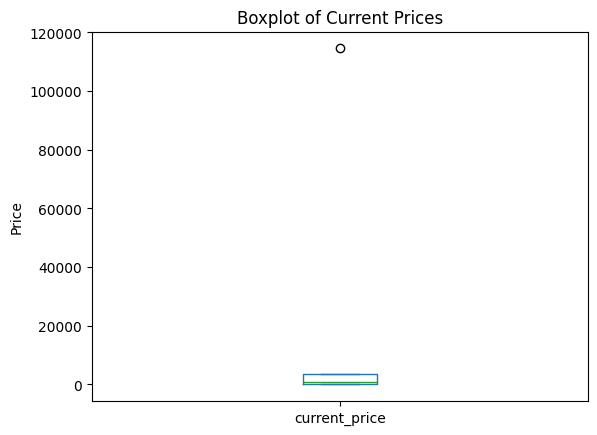

In [99]:
df2.set_index('id')['current_price'].plot.box()
plt.title('Boxplot of Current Prices')
plt.ylabel('Price')
plt.show()




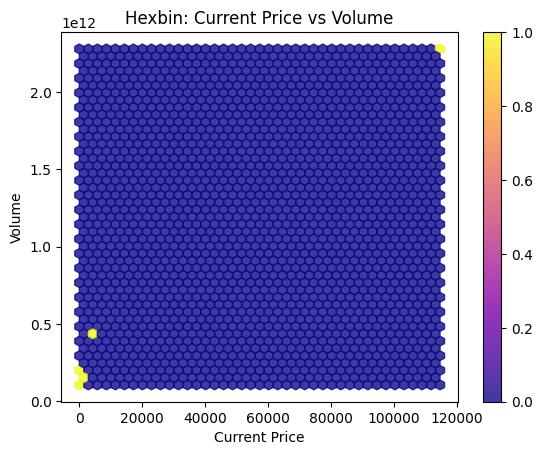

In [114]:
df2.plot.hexbin(
    x='current_price',
    y='market_cap',
    gridsize=40,
    cmap='plasma',
    alpha=0.8
)
plt.title('Hexbin: Current Price vs Volume')
plt.xlabel('Current Price')
plt.ylabel('Volume')
plt.show()


In [115]:
df.to_csv('crypto currency data.csv')

In [117]:
df.head()

,id,symbol,current_price,market_cap,market_cap_rank,total_supply,max_supply
0,bitcoin,btc,114542.00,2279633177891,1,1.990166e+07,21000000.0
1,ethereum,eth,3552.72,428779670857,2,1.207096e+08,000000
2,ripple,xrp,3.01,178659100348,3,9.998588e+10,100000000000.0
3,tether,usdt,1.00,163897164114,4,1.638945e+11,000000
4,binancecoin,bnb,758.58,105676862949,5,1.392883e+08,200000000.0
